# Rate my Professor Project
This is Part 1 of a comprehensive RateMyProfessor project aimed at building an overview of faculty and professor ratings at Cal Poly Pomona. The goal is to provide students with accessible and aggregated insights into how professors are rated on the RateMyProfessor platform.

In this phase of the project, we focus on basic data cleaning and exploratory data analysis (EDA) of initial ratings of the Cal Poly Pomona's professor csv sheet to prepare the dataset for deeper analysis in future stages.

The data was collected using a custom web scraping bot built with Selenium, designed to extract information on both current and former professors at Cal Poly Pomona.

The dataset below was scraped from RateMyProfessor and contains information on faculty from Cal Poly Pomona. Each row represents a professor, along with their aggregated rating and departmental data.

Columns Explained:

```Professor_ID:``` A unique identifier assigned to each professor.

```Professor_Name:``` The full name of the professor.

```Department:``` The academic department the professor belongs to.

```Avg_Rating:``` The average rating the professor has received (typically on a 1–5 scale).

```Total_Rating:``` The total number of ratings or reviews the professor has received.

```Would_Take_Again:``` The percentage of students who indicated they would take the professor again.

```Avg_Difficulty:``` The average difficulty rating given by students for the professor’s courses.

This structured dataset serves as the foundation for exploring professor performance, student satisfaction, and department-level insights at Cal Poly Pomona

## Objective 
The primary goal of this Pandas worksheet is to carry out essential data cleaning and transformation tasks as part of the "Transform" step in the ETL (Extract, Transform, Load) process. This involves processing the web-scraped data from RateMyProfessor.com to prepare it for reliable and consistent analysis.

Key objectives include:

* Standardizing professor names: include only first and last names, removing inconsistencies caused by middle names or initials.

* Validating numerical fields: such as ensuring avg_rating values fall within a reasonable range (typically 0–5).

* Converting key attributes: like Would_Take_Again, from string percentages (e.g., "75%") to float values for quantitative analysis.

* Standardizing department names: ensure uniform labeling, resolving issues caused by abbreviations, typos, or inconsistent naming conventions (e.g., "Comp Sci" vs. "Computer Science").

* Minimizing inconsistencies across all columns: applying consistent formats and data types, improving overall data quality and usability

## Read in Data

In [1]:
# Importing necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSV without initial data parsing/cleaning
df = pd.read_csv(r'\Users\Ivan\Downloads\Ratemyprofesser_dataclean\ratemyprofessors.csv')
df

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
0,2073648,3.2,96,Mark Okuhata,History,49%,3.5
1,2676805,4.5,74,Melody Adejare,Communication,88%,3.3
2,54640,4.7,68,Jill Nemiro,Psychology,90%,2.5
3,2147335,3.0,35,Robert Blumenfeld,Psychology,43%,3.3
4,1087541,3.8,26,Juliana Fuqua,Psychology,75%,2.8
...,...,...,...,...,...,...,...
2559,660753,4.9,4,Paul Salomaa,Mathematics,NaN,2.8
2560,1294559,5.0,1,Shelly Mendez,Mathematics,NaN,2.0
2561,913059,2.3,2,Robert W. Small,Hospitality,NaN,5.0
2562,674092,3.5,3,Wayne Wooden,Sociology,NaN,3.0


# Data Cleaning 

This Section will focus on ensuring consistency, handling missing values, and standardizing format.

In [4]:
df.head(10)

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
0,2073648,3.2,96,Mark Okuhata,History,49%,3.5
1,2676805,4.5,74,Melody Adejare,Communication,88%,3.3
2,54640,4.7,68,Jill Nemiro,Psychology,90%,2.5
3,2147335,3.0,35,Robert Blumenfeld,Psychology,43%,3.3
4,1087541,3.8,26,Juliana Fuqua,Psychology,75%,2.8
5,2652433,5.0,19,Sarah Huff,Music,100%,1.5
6,2630928,4.8,5,Tatiana Pumaccahua,Psychology,100%,1.4
7,2002633,4.9,44,Steven Camacho,English,100%,2.6
8,2171196,3.3,27,Suresh Ganapathy,Engineering,89%,2.8
9,3073381,2.3,4,Kora Tsay,Mathematics,25%,4.0


In [5]:
# Print information regarding the df's index, dtype, non/null values, memory usuage, and column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Professor_ID      2564 non-null   int64  
 1   Avg_Rating        2564 non-null   float64
 2   Total_Ratings     2564 non-null   int64  
 3   Professor_Name    2564 non-null   object 
 4   Department        2564 non-null   object 
 5   Would_Take_Again  2242 non-null   object 
 6   Avg_Difficulty    2564 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 140.3+ KB


After examining the data it seems that everything is correcty expect that : Would_Take_Again is an object instead of an float64

In [7]:
# Drop any duplicates within the df
df.drop_duplicates(inplace=True)

In [13]:
df

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
0,2073648,3.2,96,Mark Okuhata,History,49%,3.5
1,2676805,4.5,74,Melody Adejare,Communication,88%,3.3
2,54640,4.7,68,Jill Nemiro,Psychology,90%,2.5
3,2147335,3.0,35,Robert Blumenfeld,Psychology,43%,3.3
4,1087541,3.8,26,Juliana Fuqua,Psychology,75%,2.8
...,...,...,...,...,...,...,...
2559,660753,4.9,4,Paul Salomaa,Mathematics,NaN,2.8
2560,1294559,5.0,1,Shelly Mendez,Mathematics,NaN,2.0
2561,913059,2.3,2,Robert W. Small,Hospitality,NaN,5.0
2562,674092,3.5,3,Wayne Wooden,Sociology,NaN,3.0


In [15]:
# Checking if the Column contains any NaN/Nulls
df.isna().any()

Professor_ID        False
Avg_Rating          False
Total_Ratings       False
Professor_Name      False
Department          False
Would_Take_Again     True
Avg_Difficulty      False
dtype: bool

In [17]:
# Checking which Columns contains NaN/Nulls
df.isna().sum()

Professor_ID          0
Avg_Rating            0
Total_Ratings         0
Professor_Name        0
Department            0
Would_Take_Again    322
Avg_Difficulty        0
dtype: int64

In [19]:
# Removing the NaN in Would_Take_Again
df['Would_Take_Again'] = df['Would_Take_Again'] .fillna(0)

In [21]:
df.isna().sum()

Professor_ID        0
Avg_Rating          0
Total_Ratings       0
Professor_Name      0
Department          0
Would_Take_Again    0
Avg_Difficulty      0
dtype: int64

In [25]:
df['Would_Take_Again'].isnull().sum()

0

In [27]:
# Checking an specific row 
df.iloc[2559]

Professor_ID              660753
Avg_Rating                   4.9
Total_Ratings                  4
Professor_Name      Paul Salomaa
Department           Mathematics
Would_Take_Again               0
Avg_Difficulty               2.8
Name: 2559, dtype: object

In [29]:
# Replaing the NaN's with a 0
df.fillna(0, inplace=True)

In [31]:
# Double Checking
df.isna().sum()

Professor_ID        0
Avg_Rating          0
Total_Ratings       0
Professor_Name      0
Department          0
Would_Take_Again    0
Avg_Difficulty      0
dtype: int64

# Data Validation Column Ranges

Identify and address missing or incorrect formatting within the data frame along with ensuring columns constriants

## Given the knowledge on  the columns:
```Professor_ID:``` Should be unique or at least consistent in format.

```Avg_Rating:``` Must be between 0 and 5.

```Total_Ratings:``` Cannot contain negatives

```Professor_Name:``` Should be consistently formatted (e.g., First Last), with no extra spaces or all-caps issues.

```Would_Take_Again:``` Should not exceed 100 (interpreted as a percentage).

```Avg_Difficulty:``` Should not exceed 5.

In [34]:
#identify unique values within the Column to ensure no unsual values or expressions
df['Professor_ID'].unique()

array([2073648, 2676805,   54640, ...,  913059,  674092, 1166221],
      dtype=int64)

In [36]:
# Checking if any values within the column exceeds the constraint limit of 5 
df['Avg_Rating'].unique() <= 5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [38]:
# Additionally confirmation
(df['Avg_Rating'].unique() <= 5).all()

True

In [40]:
#identify unique values within the Column to ensure no unsual values or expressions
df['Total_Ratings'].unique()

array([ 96,  74,  68,  35,  26,  19,   5,  44,  27,   4,  31,  28,  25,
        16,  15,   7,  14,  10,   2,  38,  36,  22,   1, 619,  58,  61,
        49,   6,   9,   8,  51,  39,  34,  12,  45, 122,  47,  20,  17,
        18,  63,  40,  37,  29,  23,  21,  13,  67,  62, 103,  79, 138,
       101,  54,  78,  41,   3,  33,  50,  55,  30,  53,  32,  56,  43,
        42,  24,  70,  72,  48,  11,  57,  46,  93,  76,  69,  87,  73,
        59,  52,  91,  81,  80,  71,  77,  83,  92,  60, 253, 118],
      dtype=int64)

In [42]:
#identify unique values within the Column to ensure no unsual values or expressions
df["Professor_Name"].unique()

array(['Mark Okuhata', 'Melody Adejare', 'Jill Nemiro', ...,
       'Robert W. Small', 'Wayne Wooden', 'Shereef Ellaboudy'],
      dtype=object)

In [44]:
# Double checking if we have any duplicates professors in different Department
df["Professor_Name"].value_counts()

Professor_Name
David Juranich           2
Pinar Tremblay           2
Barbara Gill-Mayberry    2
Dolores Arredondo        2
Shu Shang                2
                        ..
Claudia Wainer           1
Candice Huynh            1
Jeff Burke               1
Jaehoon Seong            1
Shereef Ellaboudy        1
Name: count, Length: 2537, dtype: int64

In [46]:
# Double check if we have any duplicates professors in different Department
df[df["Professor_Name"].duplicated(keep =False)].sort_values(by="Professor_Name")

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
98,698145,3.7,78,Alane Daugherty,Health Science,60%,1.8
260,2507129,4.2,5,Alane Daugherty,Physical Education,80%,1.8
1823,1122840,3.1,6,Anthony Vercillo,Marketing,25%,3.0
1787,2114616,3.7,6,Anthony Vercillo,Business,20%,2.5
35,411553,1.2,61,Barbara Gill-Mayberry,English,3%,4.4
1162,1633109,1.0,3,Barbara Gill-Mayberry,English & Languages,0%,4.7
1963,706464,3.6,26,Brian Johnson,Psychology,56%,3.3
727,3039961,5.0,1,Brian Johnson,Mathematics,100%,3.0
1472,1879822,2.0,2,Callie Burnley,Management,0%,3.5
669,1724086,2.7,24,Callie Burnley,Business,32%,2.9


It appears that some professors are listed under multiple departments. As long as these departments are distinct and not sub-groups within the same larger department, no immediate correction is needed.

However, to ensure consistency, let’s also check if any professor names contain a middle name that may affect grouping or matching.

In [49]:
# Show professors whose names contain a middle name (more than two words)
middle_names = df[df['Professor_Name'].apply(lambda name: len(str(name).split()) > 2)]

# Display the result
print(middle_names.to_string())

      Professor_ID  Avg_Rating  Total_Ratings               Professor_Name                      Department Would_Take_Again  Avg_Difficulty
12          533961         2.9             28     Leonard K Vandegrift Iv,                         English              32%             3.6
28         3082816         5.0              1  Guadalupe Maldonado Andrade                     Agriculture             100%             2.0
33         1330528         3.7             28           Nicholas Von Glahn                      Psychology              66%             3.4
49         1698667         1.9             45               Billy/ Hoa Lam                     Mathematics              14%             4.2
52         3074777         4.9            122             Bluebell CPP cat                     Agriculture              98%             2.2
103        2376259         3.3             38        Kevyn Gardner Ricossa                       Chemistry              66%             3.8
135        2698795  

In [51]:
# Sorting middle names based on ascending order 
middle_names_sorted = middle_names.sort_values(by='Professor_Name')
print(middle_names_sorted.to_string(index=False))

 Professor_ID  Avg_Rating  Total_Ratings              Professor_Name                     Department Would_Take_Again  Avg_Difficulty
       973017         4.4             31      (Bernardus) Ben Dewald                    Hospitality              91%             1.6
      2529885         4.5              2          Abraham Mata Perez                        English              50%             3.0
       749382         3.3              3        Adam Thomas Van Wart                      Chemistry             100%             2.7
      2449398         3.1             29      Afsaneh Nouri Houshyar                       Business              56%             3.0
       749364         4.8              2        Alexander L. Rudolph                        Physics                0             3.0
       264074         3.0             51              Alexis A. Gray                   Anthropology              42%             3.4
       848940         2.6             43                Ali R Ghaneh 

After reviewing the Professor_Name column, I observed that the formatting of many names is inconsistent. Upon examining the DataFrame more closely, I identified specific anomalies in rows 287, 2183, and 2382, where the names contain misplaced middle components. Additionally, Professor_ID: 973017 and 958068 have the first and last names in differnet positions. These rows will have to be corrected manually. Additionally, a few outlier cases were found that are difficult to standardize programmatically, so they will also be handled manually. As a first step in cleaning, we will remove any nicknames and middle initials commonly enclosed in characters such as quotation marks ("), parentheses (( and )), or periods (.)

In [54]:
# Changing individual outliers 
df.loc[2183, "Professor_Name"] = "David Mylander"

In [56]:
df.iloc[2183]

Professor_ID                433241
Avg_Rating                     4.0
Total_Ratings                   18
Professor_Name      David Mylander
Department                 Physics
Would_Take_Again              100%
Avg_Difficulty                 2.9
Name: 2183, dtype: object

In [58]:
df.loc[df['Professor_Name'] == 'David  Dennis III', 'Professor_Name'] = 'David Dennis'

In [60]:
# Changing individual outliers 
df.loc[2382, "Professor_Name"] = "J Phillips"

In [62]:
df.loc[2382]

Professor_ID            1370746
Avg_Rating                  3.4
Total_Ratings                 5
Professor_Name       J Phillips
Department          Agriculture
Would_Take_Again              0
Avg_Difficulty              2.6
Name: 2382, dtype: object

In [64]:
# Changing individual outliers 
df.loc[287, "Professor_Name"] = "Thomas Keith"

In [66]:
df.loc[287]

Professor_ID              243091
Avg_Rating                   3.4
Total_Ratings                 55
Professor_Name      Thomas Keith
Department            Philosophy
Would_Take_Again             32%
Avg_Difficulty               3.6
Name: 287, dtype: object

In [68]:
# Changing individual outliers 
df.loc[12, "Professor_Name"] = 'Leonard Vandegrift'

In [70]:
df.loc[12]

Professor_ID                    533961
Avg_Rating                         2.9
Total_Ratings                       28
Professor_Name      Leonard Vandegrift
Department                     English
Would_Take_Again                   32%
Avg_Difficulty                     3.6
Name: 12, dtype: object

In [72]:
# Changing individual outliers 
df.loc[df['Professor_ID'] == 973017, 'Professor_Name'] = 'Ben Dewald'

In [74]:
df.loc[df['Professor_ID'] == 973017]

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
307,973017,4.4,31,Ben Dewald,Hospitality,91%,1.6


In [76]:
# Changing individual outliers 
df.loc[df['Professor_ID'] == 958068, 'Professor_Name'] = 'Rhodes Rhonda'

In [78]:
df.loc[df['Professor_ID'] == 958068]

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
1715,958068,4.3,7,Rhodes Rhonda,Not Specified,100%,2.3


In [80]:
# let create an object that removes the expression and middle names 
def clean_professor_name(name):
    name = str(name)
    
    # Remove anything in parentheses (e.g., nicknames)
    while '(' in name and ')' in name:
        start = name.find('(')
        end = name.find(')', start)
        name = name[:start] + name[end+1:]

    # Remove double quotes and single quotes
    for symbol in ['"', "'", '`']:
        name = name.replace(symbol, '')

    # Remove commas, periods, slashes, and dashes
    for char in [',', '.', '/']:
        name = name.replace(char, '')

    # Remove extra whitespace
    name = ' '.join(name.split())

    # Keep only first and last name if more than two words
    parts = name.split()
    if len(parts) > 2:
        name = parts[0] + ' ' + parts[-1]

    return name

# Apply to the column
df['Professor_Name'] = df['Professor_Name'].apply(clean_professor_name)

In [82]:
#Let's Double Check
df.iloc[2536]

Professor_ID            1150643
Avg_Rating                  4.8
Total_Ratings                 2
Professor_Name       Jian Zhang
Department          Hospitality
Would_Take_Again              0
Avg_Difficulty              1.5
Name: 2536, dtype: object

In [84]:
# Doubling Checking if we missed any middle names 
df_long = df[df['Professor_Name'].apply(lambda x: len(x.split()[-1]) > 7)]
print(df_long.to_string(index=False))

 Professor_ID  Avg_Rating  Total_Ratings                    Professor_Name                                Department Would_Take_Again  Avg_Difficulty
      2147335         3.0             35                 Robert Blumenfeld                                Psychology              43%             3.3
      2630928         4.8              5                Tatiana Pumaccahua                                Psychology             100%             1.4
      2171196         3.3             27                  Suresh Ganapathy                               Engineering              89%             2.8
       533961         2.9             28                Leonard Vandegrift                                   English              32%             3.6
      2202880         4.7             10           Briana Foster-Greenwood                               Mathematics             100%             3.1
      2830989         2.8             28                 Valerio Formicola Electrical Engineering & 

While the requirements of the project is calling for just the first and last name. Names such as Lisa Riggin-Walden with a hyphenated last name will be kept as it's very common. As a result, name with hyphenated parts at the end will be treated as full last name. 

We've successfully standardized the Professor_Name column. Now, let's move on to cleaning the remaining columns.

In [88]:
#identify unique values within the Column to ensure no unsual values or expressions
df["Department"].unique()

array(['History', 'Communication', 'Psychology', 'Music', 'English',
       'Engineering', 'Mathematics', 'Apparel Merchandising', 'Biology',
       'Languages', 'Science', 'Political Science', 'Agriculture',
       'Electrical Engineering & Computer Science',
       'International Bus. & Marketing', 'Animal Science', 'Medicine',
       'Business', 'Philosophy', 'Physics', 'Management', 'Literature',
       'Accounting', 'Computer Science', 'Urban & Regional Planning',
       'Architecture', 'Graphic Arts', 'Marketing',
       'Computer Information Systems', 'Chemistry', 'Economics',
       'Finance', 'Health Science', 'Geography', 'Art History', 'Theater',
       'Ethnic Studies', 'Social Work', 'Anthropology', 'Culinary Arts',
       'Landscape Architecture', 'Law', 'Physical Education', 'Film',
       'Education', 'Interdisciplinary General Ed.', 'Hospitality',
       'Sociology', 'Geology', 'Kinesiology', 'Criminal Justice',
       'Technology & Operations Mgmt',
       'Landscape 

Within the Department column, we notice several inconsistencies and variations in naming that refer to the same or similar departments. These variations can lead to incorrect grouping or fragmented analysis if left uncorrected. Some examples include:

English & Lanagues vs. English

Information Science vs. Computer Information System

ScienceEnginnering vs. Science/Engineering

Let's correct this by creating a mapping dictionary to define the standard department name for each variation to ensure accurate grouping, filtering, and analysis based on the departments


In [91]:
# Let create an dictionary in order to replace the Department Names
department_dict = {
    'English & Languages': 'English',
    'Science/Engineering': 'Science',
    'Information Science': 'Computer Information Systems',
    'Anthropology & Geo Sciences': 'Anthropology',
    'Anthropology & Geo Sciences': 'Anthropology',
    'ScienceEngineering': 'Science',
    'Physical Education': 'Physical Ed',
    'International Bus. & Marketing': 'International Business',
    'Electrical Engineering & Computer Science': 'Electrical Engineering',
    'Engineering & Computer Science': 'Computer Engineering',
    'Landscape Architecture & Regional Planning': 'Landscape Architecture',
    'Technology & Operations Mgmt' : 'Technology Operations Mgmt',
    'Urban & Regional Planning' : 'Urban Regional Planning',
    'Urban Design & Development' : 'Urban Design',
    'Interdisciplinary General Ed.' : 'General Ed',
    "Women's Studies": 'Gender Studies', 
    "Foods & Nutrition": 'Nutrition',
}    

In [93]:
# Replacing the values within the Column with the corrected grouping with our department_dict and doubling checking if our mapping works
df['Department'] = df['Department'].replace(department_dict)
df["Department"].unique()

array(['History', 'Communication', 'Psychology', 'Music', 'English',
       'Engineering', 'Mathematics', 'Apparel Merchandising', 'Biology',
       'Languages', 'Science', 'Political Science', 'Agriculture',
       'Electrical Engineering', 'International Business',
       'Animal Science', 'Medicine', 'Business', 'Philosophy', 'Physics',
       'Management', 'Literature', 'Accounting', 'Computer Science',
       'Urban Regional Planning', 'Architecture', 'Graphic Arts',
       'Marketing', 'Computer Information Systems', 'Chemistry',
       'Economics', 'Finance', 'Health Science', 'Geography',
       'Art History', 'Theater', 'Ethnic Studies', 'Social Work',
       'Anthropology', 'Culinary Arts', 'Landscape Architecture', 'Law',
       'Physical Ed', 'Film', 'Education', 'General Ed', 'Hospitality',
       'Sociology', 'Geology', 'Kinesiology', 'Criminal Justice',
       'Technology Operations Mgmt', 'Veterinary Sciences', 'Design',
       'Fine Arts', 'Mechanical Engineering', 'Co

It looks like we’ve successfully removed unusual formatting and cleaned up the inconsistencies within the Department column. We’ve grouped and standardized department names by applying a mapping dictionary, ensuring all similar departments are now labeled consistently.

In [96]:
#identify unique values within the Column to ensure no unsual values or expressions
df['Would_Take_Again'].unique()

array(['49%', '88%', '90%', '43%', '75%', '100%', '89%', '25%', '36%',
       '97%', '32%', '96%', '54%', '84%', '93%', '50%', '87%', '23%',
       '72%', '94%', '40%', '82%', '66%', '3%', '67%', '48%', '44%',
       '56%', '22%', '42%', '20%', '39%', '14%', '0%', '98%', '31%',
       '53%', '60%', '80%', '38%', '74%', '64%', '68%', '24%', '76%',
       '86%', '77%', '34%', '35%', '71%', '27%', '92%', '13%', '62%',
       '70%', '78%', '30%', '65%', '16%', '52%', '91%', '85%', '15%',
       '17%', '7%', '26%', '5%', '29%', '12%', '57%', '69%', '19%', '46%',
       '11%', '4%', '45%', '79%', '37%', '95%', '18%', '81%', '41%',
       '73%', '83%', '58%', '59%', '55%', '63%', '33%', '8%', '47%',
       '61%', '10%', '6%', '99%', '9%', 0, '28%'], dtype=object)

We know that the Would_Take_Again column should be converted to a floating-point number in order to perform numerical calculations. However, due the "%" symbol attempting to convert them directily will result in an error as strings containing non-number characters cannot be cast to floats

In [99]:
# Remove the "%" symbol form the column to preapre it for numeric conversion
df['Would_Take_Again'] = df['Would_Take_Again'].str.replace('%', ' ')

In [101]:
# Double Checking
df['Would_Take_Again']

0       49 
1       88 
2       90 
3       43 
4       75 
       ... 
2559    NaN
2560    NaN
2561    NaN
2562    NaN
2563    NaN
Name: Would_Take_Again, Length: 2564, dtype: object

In [103]:
# Conversion to float 
df['Would_Take_Again']= df['Would_Take_Again'].astype(float)

In [105]:
#Double checking
df.head(10)

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
0,2073648,3.2,96,Mark Okuhata,History,49.0,3.5
1,2676805,4.5,74,Melody Adejare,Communication,88.0,3.3
2,54640,4.7,68,Jill Nemiro,Psychology,90.0,2.5
3,2147335,3.0,35,Robert Blumenfeld,Psychology,43.0,3.3
4,1087541,3.8,26,Juliana Fuqua,Psychology,75.0,2.8
5,2652433,5.0,19,Sarah Huff,Music,100.0,1.5
6,2630928,4.8,5,Tatiana Pumaccahua,Psychology,100.0,1.4
7,2002633,4.9,44,Steven Camacho,English,100.0,2.6
8,2171196,3.3,27,Suresh Ganapathy,Engineering,89.0,2.8
9,3073381,2.3,4,Kora Tsay,Mathematics,25.0,4.0


In [107]:
#identify unique values within the Column to ensure no unsual values or expressions
df['Avg_Difficulty'].unique() 

array([3.5, 3.3, 2.5, 2.8, 1.5, 1.4, 2.6, 4. , 2.4, 3.6, 3.1, 3.4, 3. ,
       2.1, 1.8, 2.7, 1.3, 2. , 4.1, 4.4, 3.8, 2.3, 3.7, 4.2, 2.2, 4.6,
       3.2, 3.9, 2.9, 4.3, 5. , 1.7, 4.5, 1.9, 4.9, 1.6, 1. , 1.2, 1.1,
       4.8, 4.7])

In [109]:
# Checking if any values within the column exceeds the constraint limit of 5 
(df['Avg_Difficulty'].unique() <= 5).all()

True

# Verify 

In [111]:
# Final Check to ensure that the data is consistent 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Professor_ID      2564 non-null   int64  
 1   Avg_Rating        2564 non-null   float64
 2   Total_Ratings     2564 non-null   int64  
 3   Professor_Name    2564 non-null   object 
 4   Department        2564 non-null   object 
 5   Would_Take_Again  2242 non-null   float64
 6   Avg_Difficulty    2564 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 140.3+ KB


In [113]:
df.isna().sum()

Professor_ID          0
Avg_Rating            0
Total_Ratings         0
Professor_Name        0
Department            0
Would_Take_Again    322
Avg_Difficulty        0
dtype: int64

In [120]:
df['Would_Take_Again'] = df['Would_Take_Again'].fillna(0)

In [151]:
df.isna().sum()

Professor_ID        0
Avg_Rating          0
Total_Ratings       0
Professor_Name      0
Department          0
Would_Take_Again    0
Avg_Difficulty      0
dtype: int64

In [153]:
# Shuffle the entire Dataframe randomly by sampling 100% of the data in a new order
df.sample(frac = 1)

,Professor_ID,Avg_Rating,Total_Ratings,Professor_Name,Department,Would_Take_Again,Avg_Difficulty
645,72815,4.1,58,Hoon Kim,Mathematics,76.0,2.6
855,2171915,4.4,25,Hao Ji,Computer Science,88.0,2.5
621,2443981,4.1,28,Andrew Pagnon,Engineering,83.0,4.0
2390,1821325,5.0,2,Stan Abraham,Management,0.0,2.0
68,923186,2.9,34,Gregory Carlton,Computer Science,44.0,3.9
...,...,...,...,...,...,...,...
1558,2091657,5.0,6,Kip Dickson,Architecture,100.0,2.7
845,2768878,4.7,3,Chris Crudo,Computer Information Systems,100.0,2.3
344,2494434,3.8,42,Charlie Royas,Engineering,74.0,2.0
1233,2448590,2.3,11,Cherng-Shii Yeh,Engineering,37.0,3.4


# Finalization of Cleaned Dataframe
To prepare the dataset for analysis, we performed several key final cleaning steps to ensure consistency, accuracy, and usability:

1. Standardization of Professor Names:
We carefully standardized the formatting of professor names, ensuring uniform casing and spacing. When middle names or initials were present, we retained only the first and last names to avoid inconsistencies. Care was taken to avoid unintentionally merging or removing distinct entries that differed only by middle names or initials.

2. Conversion of 'Would_Take_Again' to Float:
The 'Would_Take_Again' column, originally containing percentage values as strings (e.g., "75%") or missing entries, was cleaned by stripping the percentage sign, converting to float (e.g., 75.0), and filling missing values with 0.0 for consistency and numeric analysis.

3. Duplicate Checking:
We checked for and removed any exact duplicate rows that could distort the analysis. Additionally, near-duplicates based on key features (e.g., professor name and course) were reviewed and verified to ensure no data was mistakenly discarded.

4. Validation of Numerical Columns:
We conducted sanity checks on numeric columns like 'avg_rating', 'avg_difficulty', and 'Would_Take_Again' to ensure no out-of-range or unusual values existed. These columns were confirmed to fall within expected boundaries (e.g., ratings between 1 and 5, difficulties between 1 and 5, and percentages between 0 and 100).

5. Department Name Standardization:
We standardized department names to eliminate variations due to abbreviations, typos, or inconsistent naming (e.g., "Comp Sci", "Computer Science Dept" → "Computer Science"). This step ensures that aggregation and grouping by department remain accurate.

In [155]:
# Saving the Cleaned Dataframe
df.to_csv('clean_ratemyprofessors.csv',index=False)

The Dataset is Ready 

# Initial Analysis 

Let's begin with some basic exploratory data analysis (EDA) and visualizations to uncover key patterns and insights. This basic understanding will help guide the design and focus of future dashboards in Tableau or Power BI.

### Analyze by Ratings & Difficulty

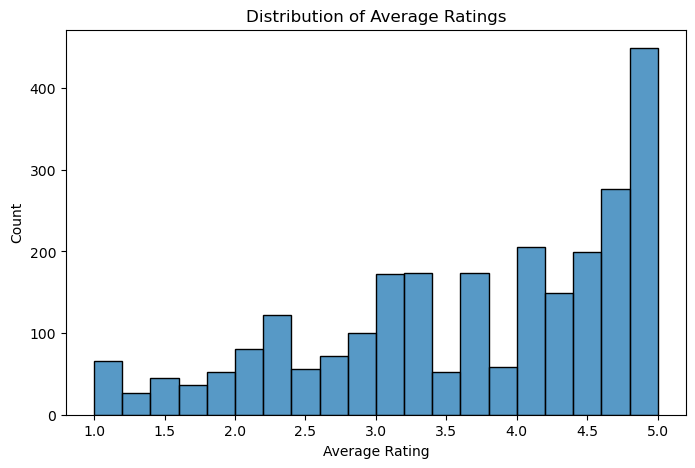

In [157]:
plt.figure(figsize=(8, 5))

sns.histplot(df['Avg_Rating'], bins=20)

plt.title('Distribution of Average Ratings')

plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

## Observations: 

* Clear positive shew - majority of professors have an high amount of 5's.
* Majority of Professors have rating between 3 and 5

## Takeaway:

* The majority of professors at Cal Poly Pomona tend to receive high ratings, indicating generally positive student feedback across the board. 

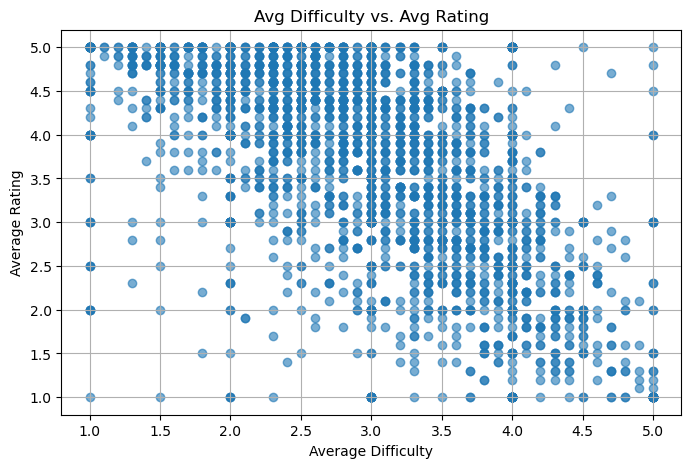

In [133]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Avg_Difficulty'], df['Avg_Rating'], alpha=0.6)
plt.title('Avg Difficulty vs. Avg Rating')
plt.xlabel('Average Difficulty')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Observations:
* As Avg_Difficulty increase, Avg_rating begins to drop
* A lower Avg Difficulty correlates to an higher Avg_rating score

### Takeaway:

* Easier Professor tend to be rated more favorably, suggesting that student satisfaction is directly influenced by difficulty.

In [167]:
df['Avg_Rating'].value_counts()

Avg_Rating
5.0    378
4.0    149
3.0    122
4.8    117
4.5    108
4.3     94
4.4     91
4.7     88
3.3     75
3.8     72
4.6     72
4.9     71
1.0     64
2.8     60
2.0     59
3.9     59
2.5     56
4.1     56
4.2     55
3.6     54
3.4     53
3.5     52
3.1     50
2.3     49
3.7     47
3.2     45
2.7     44
2.9     40
2.2     37
2.4     36
1.5     29
2.6     28
1.8     27
1.9     25
2.1     21
1.6     21
1.3     17
1.4     16
1.7     16
1.2      9
1.1      2
Name: count, dtype: int64

In [175]:
df['Avg_Difficulty'].value_counts()

Avg_Difficulty
3.0    275
2.0    189
4.0    156
2.5    115
3.3    111
2.3    104
3.5     99
2.8     96
3.4     83
3.7     80
3.6     79
1.0     76
2.4     74
3.1     73
3.2     71
2.6     69
2.9     68
2.7     68
3.8     60
1.5     55
3.9     50
2.2     46
4.2     40
5.0     39
4.1     39
1.8     38
4.3     38
2.1     37
1.7     32
4.5     29
1.3     29
1.9     29
4.4     25
1.6     23
4.6     15
1.4     14
4.7     14
4.8     11
1.2      7
4.9      5
1.1      3
Name: count, dtype: int64

In [159]:
# Creating rating bin to categorize Rating for deeper analysis
rating_bins = [0, 2.0, 3.0, 4.0, 5.0]

rating_labels = ['Poor (0–2)', 'Average (2–3)', 'Good (3–4)', 'Excellent (4–5)']

# Creating a new column for Rating Bin 
df['Rating_Category'] = pd.cut(df['Avg_Rating'], bins=rating_bins, labels=rating_labels)

In [161]:
# Applying and checking the new column 
rating_counts = df['Rating_Category'].value_counts().sort_index()
print(rating_counts)

Rating_Category
Poor (0–2)          285
Average (2–3)       493
Good (3–4)          656
Excellent (4–5)    1130
Name: count, dtype: int64


In [163]:
# Creating difficulty bin to categorize Rating for deeper analysis
difficulty_bins = [0, 2.0, 3.0, 4.0, 5.0]

difficulty_labels = ['Easy (0–2)', 'Moderate (2–3)', 'Challenging (3–4)', 'Hard (4–5)']

# Creating a new column for Difficulty Bin 
df['Difficulty_Level'] = pd.cut(df['Avg_Difficulty'], bins=difficulty_bins, labels=difficulty_labels)

In [165]:
# Applying and checking the new column 
diff_counts = df['Difficulty_Level'].value_counts().sort_index()
print(diff_counts)

Difficulty_Level
Easy (0–2)           495
Moderate (2–3)       952
Challenging (3–4)    862
Hard (4–5)           255
Name: count, dtype: int64


In [167]:
# Cross-tabling the two new columns to for an heatmap
rating_vs_difficulty = pd.crosstab(df['Rating_Category'], df['Difficulty_Level'])
print(rating_vs_difficulty)

Difficulty_Level  Easy (0–2)  Moderate (2–3)  Challenging (3–4)  Hard (4–5)
Rating_Category                                                            
Poor (0–2)                14              37                106         128
Average (2–3)             32              99                271          91
Good (3–4)                61             277                291          27
Excellent (4–5)          388             539                194           9


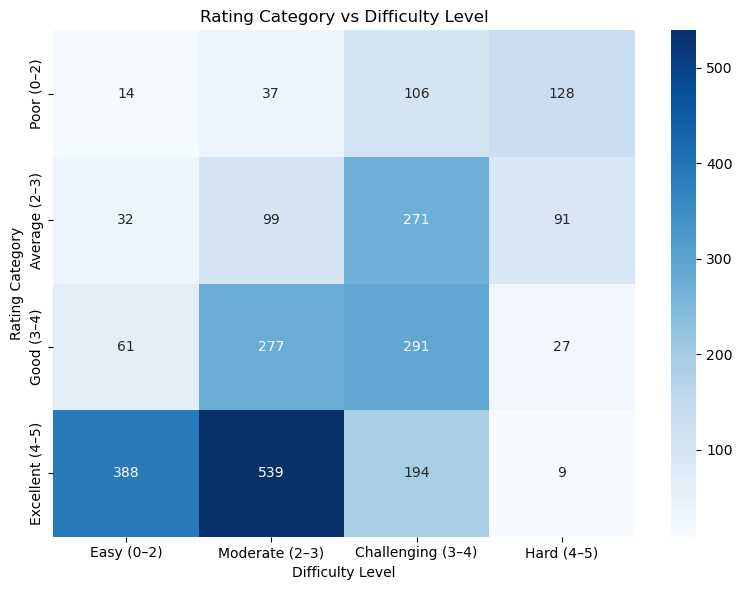

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(rating_vs_difficulty, annot=True, fmt='d', cmap='Blues')
plt.title('Rating Category vs Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Rating Category')
plt.tight_layout()
plt.show()

## Observation 

* Excellent Rating are most common among Professors, while Hard Difficulty has the fewest professors
* Moderate and Challenging difficulty contaims the widest spread across all rating categories
* Moderate and Excellent contains the highest count

### Takeaways:
* Moderate difficulty seems to be the sweet spot, balancing student satisfaction with academic rigor.
* Professors who are perceived as very hard struggle to earn high ratings, possibly due to workload or grading policies.
* Easier classes often correlate with higher ratings, but not exclusively — students still value teaching quality, not just ease